# Logistic Regression
Logistic regression is a simple machine learning method that you can use to predict an observation's category based on the relationship between the target feature and independent categorical predictive features in the data set. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
%matplotlib inline
price = pd.read_csv('C:/Users/meena/Documents/Python_Scripts/Assign2.csv')
price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


Checking that my target variable is binary

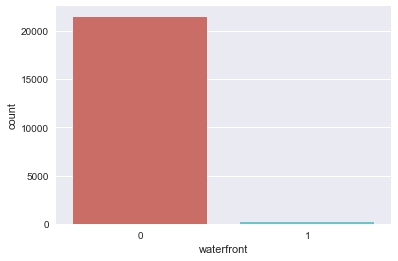

In [3]:
sb.countplot(x='waterfront',data=price, palette='hls')

Checking for missing values

In [4]:
price.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

Our data is clean without null values

In [5]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
dtypes: float64(3), int64(12), object(1)
memory usage: 2.6+ MB


Dropping the data that cannot be applicable for predicting waterfront

In [6]:
price_data = price.drop(['id','date','bedrooms','bathrooms','condition','view','yr_renovated'], 1)
price_data.head()

,price,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built
0,221900.0,1180,5650,1.0,0,7,1180,0,1955
1,538000.0,2570,7242,2.0,0,7,2170,400,1951
2,180000.0,770,10000,1.0,0,6,770,0,1933
3,604000.0,1960,5000,1.0,0,7,1050,910,1965
4,510000.0,1680,8080,1.0,0,8,1680,0,1987


# Multi Colinearity
Multicollinearity (also collinearity) is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated. We will find collinearity using correaltion heat map

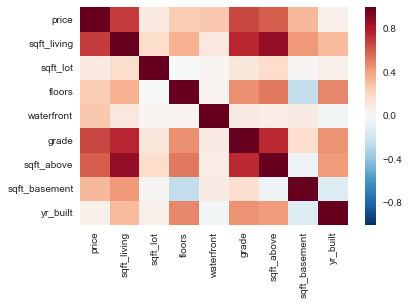

In [7]:
sb.heatmap(price_data.corr())  

There is a colinearity between sqft_above and sqt_living. So I will drop sqft_above

In [8]:
price_data = price_data.drop(['sqft_above'],axis =1)

In [9]:
price_data.head()

,price,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built
0,221900.0,1180,5650,1.0,0,7,0,1955
1,538000.0,2570,7242,2.0,0,7,400,1951
2,180000.0,770,10000,1.0,0,6,0,1933
3,604000.0,1960,5000,1.0,0,7,910,1965
4,510000.0,1680,8080,1.0,0,8,0,1987


There is no other categorical data in the data set

In [10]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
price            21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
grade            21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
dtypes: float64(2), int64(6)
memory usage: 1.3 MB


Subsetting data into independent predictor variables and target variable

In [11]:
X = price_data.ix[:,(0,1,2,3,5,6,7)].values
y = price_data.ix[:,4].values

C:\Users\meena\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


Creating a training data set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Deploying and evaluating model

In [13]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
LogReg.score(X_train, y_train)

0.9929274902505123

In [15]:
y_pred = LogReg.predict(X)
print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     21450
          1       0.48      0.10      0.16       163

avg / total       0.99      0.99      0.99     21613



In [16]:
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[21433    17]
 [  147    16]]


The results from the confusion matrix are telling us that 21433 and 16 are the number of correct predictions. 147 and 17 are the number of incorrect predictions